## Read and plot near-real-time Wave Glider data

first cut by Tom, 10/18/2021
Updated for IOP1, 10/9/2022

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cftime

import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
import functions  # requires functions.py from this directory


In [2]:
%matplotlib inline
# %matplotlib qt5
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '../plots/' + 'SMODE_'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

In [3]:
savefig = True
zoom = False
if zoom:
    xmin, xmax = (-126,-121)
    ymin, ymax = (36.25,38.5)
    levels = np.linspace(14,17,21)-2.5
else:
    xmin, xmax = (-127,-121)
    ymin, ymax = (35, 45)
    levels = np.linspace(13,18,11)

    

In [5]:
# url = 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/waveglider/SV3-1043_PLD1_TAB1.nc'
# url = 'http://smode.whoi.edu:8080/thredds/fileServer/insitu/waveglider/SV3-1043_PLD1_TAB1.nc'
# url = 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/waveglider/SV3-1043_PLD2_TAB2.nc'
url = 'http://smode.whoi.edu:8080/thredds/fileServer/insitu/waveglider/SV3-1043_PLD1_TAB1.nc#mode=bytes'
ds_payload1_table1 = xr.open_dataset(url)

In [6]:
url = 'http://smode.whoi.edu:8080/thredds/fileServer/insitu/waveglider/SV3-1043_PLD2_TAB1.nc#mode=bytes'
ds_payload2_table1 = xr.open_dataset(url)

In [7]:
url = 'http://smode.whoi.edu:8080/thredds/fileServer/insitu/waveglider/SV3-1043_PLD2_TAB2.nc#mode=bytes'
ds_payload2_table2 = xr.open_dataset(url,drop_variables=['z'])

In [8]:
url = 'http://smode.whoi.edu:8080/thredds/fileServer/insitu/waveglider/SV3-1043_PLD2_TAB3.nc#mode=bytes'
ds_payload2_table3 = xr.open_dataset(url,drop_variables=['freq'])

In [9]:
ds_payload1_table1

<xarray.Dataset>
Dimensions:                      (time: 723)
Coordinates:
  * time                         (time) datetime64[ns] 2021-10-18T04:01:04 .....
Data variables:
    year                         (time) float32 ...
    day                          (time) float32 ...
    hour                         (time) float32 ...
    minute                       (time) float32 ...
    sec                          (time) float32 ...
    RECORD                       (time) float32 ...
    batt_volt_Min                (time) float32 ...
    panel_temp_Avg               (time) float32 ...
    proc_time_Max                (time) float32 ...
    proc_time_Avg                (time) float32 ...
    buffer_depth_Max             (time) float32 ...
    buffer_depth_Avg             (time) float32 ...
    skipped_scan_Max             (time) float32 ...
    skipped_system_scan_Max      (time) float32 ...
    variable_out_of_bound        (time) float32 ...
    watchdog_errors              (time) float32 ...
    SkippedRecord_TAB_vnav_Max   (time) float32 ...
    SkippedRecord_TAB_10hz_Max   (time) float32 ...
    SkippedRecord_TAB_20hz_Max   (time) float32 ...
    SkippedRecord_TAB_AD2CP_Max  (time) float32 ...
    SkippedRecord_TAB_AVG_Max    (time) float32 ...
    SkippedRecord_TAB_TAB1_Max   (time) float32 ...
    SkippedRecord_vnav1          (time) float32 ...
    AWS_Avg                      (time) float32 ...
    AWD_Avg                      (time) float32 ...
    TWS_Avg                      (time) float32 ...
    TWD_Avg                      (time) float32 ...
    temp_gill_Avg                (time) float32 ...
    roll_xyz_Min                 (time) float32 ...
    roll_xyz_Avg                 (time) float32 ...
    roll_xyz_Max                 (time) float32 ...
    pitch_xyz_Min                (time) float32 ...
    pitch_xyz_Avg                (time) float32 ...
    pitch_xyz_Max                (time) float32 ...
    heading_xyz_Min              (time) float32 ...
    heading_xyz_Avg              (time) float32 ...
    heading_xyz_Max              (time) float32 ...
    AD2CP_pressure_Avg           (time) float32 ...
    AD2CP_temperature_Avg        (time) float32 ...
    vn_heading                   (time) float32 ...
    vn_pitch_Avg                 (time) float32 ...
    vn_roll_Avg                  (time) float32 ...
    vn_vn_Avg                    (time) float32 ...
    vn_ve_Avg                    (time) float32 ...
    vn_vd_Avg                    (time) float32 ...
    vn_sat1_Avg                  (time) float32 ...
    index_vnav_file              (time) float32 ...
    index_10hz_file              (time) float32 ...
    index_20hz_file              (time) float32 ...
    index_ad2cp_file             (time) float32 ...
    index_vnav2_file             (time) float32 ...
Attributes:
    Name:                 SV3-1043_PLD1_TAB1
    wms_title:            SV3-1043_PLD1_TAB1
    title:                Waveglider SV3-1043 real-time data - payload PLD1_TAB1
    instrument:           Liquid Robotics SV3 Waveglider
    sea_name:             Pacific
    keywords_vocabulary:  CF Standard Names, GCMD Science Keywords
    keywords:             Waveglider, S-MODE, Pacific Ocean, Temperature
    history:              2021-10-29 15:20Z Downloaded real-time data from WG...
    time_coverage_start:  2021-10-18T00:01:00
    time_coverage_end:    2021-10-29T15:01:00

In [10]:
ds_payload2_table1

<xarray.Dataset>
Dimensions:                      (time: 701)
Coordinates:
  * time                         (time) datetime64[ns] 2021-10-18T04:01:04 .....
Data variables:
    year                         (time) float32 ...
    day                          (time) float32 ...
    hour                         (time) float32 ...
    minute                       (time) float32 ...
    sec                          (time) float32 ...
    RECORD                       (time) float32 ...
    batt_volt_Min                (time) float32 ...
    panel_temp_Avg               (time) float32 ...
    proc_time_Max                (time) float32 ...
    proc_time_Avg                (time) float32 ...
    slow_proc_time_1_Max         (time) float32 ...
    slow_proc_time_1_Avg         (time) float32 ...
    slow_proc_time_2_Max         (time) float32 ...
    slow_proc_time_2_Avg         (time) float32 ...
    buffer_depth_Max             (time) float32 ...
    buffer_depth_Avg             (time) float32 ...
    skipped_scan_Max             (time) float32 ...
    skipped_system_scan_Max      (time) float32 ...
    skipped_slow_scan_1_Max      (time) float32 ...
    skipped_slow_scan_2_Max      (time) float32 ...
    variable_out_of_bound        (time) float32 ...
    watchdog_errors              (time) float32 ...
    SkippedRecord_TAB_1hz_Max    (time) float32 ...
    SkippedRecord_TAB_10hz_Max   (time) float32 ...
    SkippedRecord_TAB_ADCP_Max   (time) float32 ...
    SkippedRecord_TAB_AVG_Max    (time) float32 ...
    SkippedRecord_TAB_FFT_Max    (time) float32 ...
    SkippedRecord_TAB_TAB1_Max   (time) float32 ...
    SkippedRecord_TAB_TAB2_Max   (time) float32 ...
    SkippedRecord_TAB_TAB3_Max   (time) float32 ...
    latitude_1hz_Avg             (time) float32 ...
    longitude_1hz_Avg            (time) float32 ...
    heading_Min                  (time) float32 ...
    heading_Avg                  (time) float32 ...
    heading_Max                  (time) float32 ...
    Hs_std                       (time) float32 ...
    Hs_fft                       (time) float32 ...
    TrueWindSpeed_Avg            (time) float32 ...
    TrueWindDirection_Avg        (time) float32 ...
    atmospheric_temperature_Avg  (time) float32 ...
    relative_humidity_Avg        (time) float32 ...
    atmospheric_pressure_Avg     (time) float32 ...
    uctd_temp_Avg                (time) float32 ...
    uctd_cond_Avg                (time) float32 ...
    SMP21_flux_Wm2_Avg           (time) float32 ...
    SGR4_flux_Wm2_Avg            (time) float32 ...
    index_1hz_file               (time) float32 ...
    index_10hz_file              (time) float32 ...
    index_ADCP_file              (time) float32 ...
Attributes:
    Name:                 SV3-1043_PLD2_TAB1
    wms_title:            SV3-1043_PLD2_TAB1
    title:                Waveglider SV3-1043 real-time data - payload PLD2_TAB1
    instrument:           Liquid Robotics SV3 Waveglider
    sea_name:             Pacific
    keywords_vocabulary:  CF Standard Names, GCMD Science Keywords
    keywords:             Waveglider, S-MODE, Pacific Ocean, Temperature
    history:              2021-10-29 15:20Z Downloaded real-time data from WG...
    time_coverage_start:  2021-10-18T00:01:00
    time_coverage_end:    2021-10-29T15:16:00

In [11]:
ds_payload2_table2

<xarray.Dataset>
Dimensions:               (time: 702, z: 50)
Coordinates:
  * time                  (time) datetime64[ns] 2021-10-18T04:01:04 ... 2021-...
Dimensions without coordinates: z
Data variables:
    year                  (time) float32 ...
    day                   (time) float32 ...
    hour                  (time) float32 ...
    minute                (time) float32 ...
    sec                   (time) float32 ...
    RECORD                (time) float32 ...
    roll_ADCP_Avg         (time) float32 ...
    pitch_ADCP_Avg        (time) float32 ...
    heading_ADCP_Avg      (time) float32 ...
    Temperature_ADCP_Avg  (time) float32 ...
    current_east          (z, time) float32 ...
    current_north         (z, time) float32 ...
Attributes:
    Name:                 SV3-1043_PLD2_TAB2
    wms_title:            SV3-1043_PLD2_TAB2
    title:                Waveglider SV3-1043 real-time data - payload PLD2_TAB2
    instrument:           Liquid Robotics SV3 Waveglider
    sea_name:             Pacific
    keywords_vocabulary:  CF Standard Names, GCMD Science Keywords
    keywords:             Waveglider, S-MODE, Pacific Ocean, Temperature
    history:              2021-10-29 15:20Z Downloaded real-time data from WG...
    time_coverage_start:  2021-10-18T00:02:00
    time_coverage_end:    2021-10-29T15:17:00

In [12]:
ds_payload2_table3

<xarray.Dataset>
Dimensions:  (freq: 50, time: 701)
Coordinates:
  * time     (time) datetime64[ns] 2021-10-18T04:03:12 ... 2021-10-29T19:18:24
Dimensions without coordinates: freq
Data variables:
    year     (time) float32 ...
    day      (time) float32 ...
    hour     (time) float32 ...
    minute   (time) float32 ...
    sec      (time) float32 ...
    RECORD   (time) float32 ...
    f2xSuu   (freq, time) float32 ...
    theta    (freq, time) float32 ...
    Suu      (freq, time) float32 ...
    Szz      (freq, time) float32 ...
Attributes:
    Name:                 SV3-1043_PLD2_TAB3
    wms_title:            SV3-1043_PLD2_TAB3
    title:                Waveglider SV3-1043 real-time data - payload PLD2_TAB3
    instrument:           Liquid Robotics SV3 Waveglider
    sea_name:             Pacific
    keywords_vocabulary:  CF Standard Names, GCMD Science Keywords
    keywords:             Waveglider, S-MODE, Pacific Ocean, Temperature
    history:              2021-10-29 15:20Z Downloaded real-time data from WG...
    time_coverage_start:  2021-10-18T00:03:00
    time_coverage_end:    2021-10-29T15:18:00

## Plot some health diagnostics for monitoring
Around 1200 UTC on 10/20/2021, a wave broke the lashings on the WGs, and this is a real-time effort to assess the status of the instruments

The data file of most interest at the moment is ```ds_payload2_table1```

In [13]:
ds = ds_payload2_table1

C:\Users\jtomf\anaconda3\envs\base2\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\jtomf\anaconda3\envs\base2\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'transform': <cartopy.crs.PlateCarree object at 0x000002BC430195E0>, 'color': 'w'}


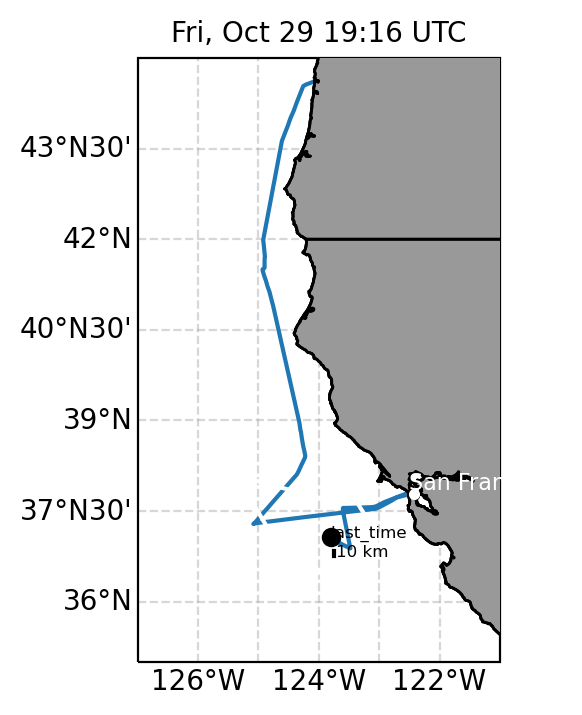

In [14]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
extent = [xmin, xmax, ymin, ymax]
ax.set_extent(extent, crs=ccrs.PlateCarree())
'''
daystr=ds.time.dt.day.astype(str).values[0]
monstr=ds.time.dt.month.astype(str).values[0]
yrstr=ds.time.dt.year.astype(str).values[0]
day_str = monstr+'-'+daystr+'-'+yrstr
'''
day_str=ds.time.isel(time=-1).dt.strftime("%a, %b %d %H:%M").values
ax.set_title(day_str+' UTC', size = 10.)

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')
ax.add_feature(cartopy.feature.STATES, zorder=3, edgecolor='black')
ax.plot(ds.longitude_1hz_Avg,ds.latitude_1hz_Avg,transform=ccrs.PlateCarree())
ax.plot(ds.longitude_1hz_Avg.isel(time=-1),ds.latitude_1hz_Avg.isel(time=-1),'ko',transform=ccrs.PlateCarree())
ax.text(ds.longitude_1hz_Avg.isel(time=-1),ds.latitude_1hz_Avg.isel(time=-1), 'last_time', fontsize=6, transform=ccrs.PlateCarree())
# cs = ax.contourf(ds.lon,ds.lat,np.squeeze(ds.sea_surface_temperature)-273.15, levels, extend='both', transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,fraction = 0.022,extend='both')
# cb.set_label('SST [$\circ$C]',fontsize = 10)
plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')

# Add a 10 km scale bar
km_per_deg_lat=gsw.geostrophy.distance((125,125), (37,38))/1000
deg_lat_equal_10km=10/km_per_deg_lat
x0 = -123.75
y0 = 36.75
ax.plot(x0+np.asarray([0, 0]),y0+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree(),color='k')
ax.text(x0+2/60, y0-.5/60, '10 km', fontsize=6,transform=ccrs.PlateCarree())

if savefig:
    plt.savefig(__figdir__+'_foo_WG_pos_' + day_str + '.' +plotfiletype,**savefig_args)


In [15]:
ds.longitude_1hz_Avg

<xarray.DataArray 'longitude_1hz_Avg' (time: 701)>
array([-124.045, -124.045, -124.045, ..., -123.792, -123.799, -123.805],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2021-10-18T04:01:04 ... 2021-10-29T19:16:16
Attributes:
    units:    degrees

In [16]:
ds["time"].dt.strftime("%a, %b %d %H:%M")


<xarray.DataArray 'strftime' (time: 701)>
array(['Mon, Oct 18 04:01', 'Mon, Oct 18 04:16', 'Mon, Oct 18 04:30',
       'Mon, Oct 18 04:45', 'Mon, Oct 18 05:00', 'Mon, Oct 18 05:15',
       'Mon, Oct 18 05:30', 'Mon, Oct 18 05:45', 'Mon, Oct 18 06:00',
       'Mon, Oct 18 06:15', 'Mon, Oct 18 06:30', 'Mon, Oct 18 06:45',
       'Mon, Oct 18 07:00', 'Mon, Oct 18 07:15', 'Mon, Oct 18 07:30',
       'Mon, Oct 18 07:45', 'Mon, Oct 18 08:00', 'Mon, Oct 18 08:14',
       'Mon, Oct 18 08:32', 'Mon, Oct 18 08:46', 'Mon, Oct 18 09:01',
       'Mon, Oct 18 09:16', 'Mon, Oct 18 09:31', 'Mon, Oct 18 09:46',
       'Mon, Oct 18 10:01', 'Mon, Oct 18 10:16', 'Mon, Oct 18 10:31',
       'Mon, Oct 18 10:46', 'Mon, Oct 18 11:01', 'Mon, Oct 18 11:16',
       'Mon, Oct 18 11:31', 'Mon, Oct 18 11:46', 'Mon, Oct 18 12:01',
       'Mon, Oct 18 12:16', 'Mon, Oct 18 12:30', 'Mon, Oct 18 12:45',
       'Mon, Oct 18 13:00', 'Mon, Oct 18 13:15', 'Mon, Oct 18 13:30',
       'Mon, Oct 18 13:45', 'Mon, Oct 18 14:00', 'Mon, Oct 18 14:15',
       'Mon, Oct 18 14:30', 'Mon, Oct 18 14:45', 'Mon, Oct 18 15:00',
       'Mon, Oct 18 15:15', 'Mon, Oct 18 15:30', 'Mon, Oct 18 15:45',
       'Mon, Oct 18 16:00', 'Mon, Oct 18 16:17', 'Mon, Oct 18 16:32',
       'Mon, Oct 18 16:46', 'Mon, Oct 18 17:01', 'Mon, Oct 18 17:16',
       'Mon, Oct 18 17:31', 'Mon, Oct 18 17:46', 'Mon, Oct 18 18:01',
       'Mon, Oct 18 18:16', 'Mon, Oct 18 18:31', 'Mon, Oct 18 18:46',
...
       'Fri, Oct 29 04:30', 'Fri, Oct 29 04:45', 'Fri, Oct 29 05:00',
       'Fri, Oct 29 05:45', 'Fri, Oct 29 05:30', 'Fri, Oct 29 06:00',
       'Fri, Oct 29 05:15', 'Fri, Oct 29 06:15', 'Fri, Oct 29 06:30',
       'Fri, Oct 29 06:45', 'Fri, Oct 29 07:00', 'Fri, Oct 29 07:45',
       'Fri, Oct 29 07:15', 'Fri, Oct 29 08:00', 'Fri, Oct 29 08:17',
       'Fri, Oct 29 08:32', 'Fri, Oct 29 08:46', 'Fri, Oct 29 09:01',
       'Fri, Oct 29 09:16', 'Fri, Oct 29 09:31', 'Fri, Oct 29 09:46',
       'Fri, Oct 29 10:01', 'Fri, Oct 29 10:16', 'Fri, Oct 29 10:31',
       'Fri, Oct 29 10:46', 'Fri, Oct 29 11:01', 'Fri, Oct 29 11:16',
       'Fri, Oct 29 11:31', 'Fri, Oct 29 11:46', 'Fri, Oct 29 12:01',
       'Fri, Oct 29 12:16', 'Fri, Oct 29 12:30', 'Fri, Oct 29 12:45',
       'Fri, Oct 29 13:00', 'Fri, Oct 29 13:15', 'Fri, Oct 29 13:30',
       'Fri, Oct 29 13:45', 'Fri, Oct 29 14:00', 'Fri, Oct 29 14:15',
       'Fri, Oct 29 14:30', 'Fri, Oct 29 14:45', 'Fri, Oct 29 15:00',
       'Fri, Oct 29 15:15', 'Fri, Oct 29 15:30', 'Fri, Oct 29 15:45',
       'Fri, Oct 29 16:00', 'Fri, Oct 29 16:14', 'Fri, Oct 29 16:32',
       'Fri, Oct 29 16:46', 'Fri, Oct 29 17:01', 'Fri, Oct 29 17:16',
       'Fri, Oct 29 17:31', 'Fri, Oct 29 17:46', 'Fri, Oct 29 18:01',
       'Fri, Oct 29 18:16', 'Fri, Oct 29 18:31', 'Fri, Oct 29 18:46',
       'Fri, Oct 29 19:01', 'Fri, Oct 29 19:16'], dtype=object)
Coordinates:
  * time     (time) datetime64[ns] 2021-10-18T04:01:04 ... 2021-10-29T19:16:16

In [17]:
day_str=ds.time.isel(time=-1).dt.strftime("%a, %b %d %H:%M")


In [18]:
print(day_str.values)

Fri, Oct 29 19:16
